# **Project: Book Recommendation System**

#Business Objective:
##Generate the features from the dataset and use them to recommend the books accordingly to the users.


#IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#EDA

#READ THE DATASETS: BOOKS, RATINGS, USERS

In [ ]:
ratings=pd.read_csv("/content/Ratings.csv")
users=pd.read_csv("/content/Users.csv")

In [ ]:
books=pd.read_csv("/content/Books.csv")

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.shape

(271360, 8)

In [ ]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

 there are some books with the same title but possibly different editions or ISBNs.

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [ ]:
ratings[ratings['Book-Rating'] == 0].shape

(716109, 3)

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.shape

(278858, 3)

In [ ]:
users.duplicated().sum()

0

In [ ]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

#MERGE THE DATA

In [ ]:
data = pd.merge(users,ratings, on='User-ID')
data = pd.merge(data, books, on='ISBN')

data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


# Data Cleaning and Pre-processing

##Data Dimensions

In [ ]:
data.shape

(1031136, 12)

##Data columns

In [ ]:
data.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
#Droping Unnecessary columns
data.drop(['Location','Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

##Data Types and Non Null Count

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Age                  753301 non-null   float64
 2   ISBN                 1031136 non-null  object 
 3   Book-Rating          1031136 non-null  int64  
 4   Book-Title           1031136 non-null  object 
 5   Book-Author          1031134 non-null  object 
 6   Year-Of-Publication  1031136 non-null  object 
 7   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.9+ MB


##Checking for Null Values

In [ ]:
data.isna().sum()

User-ID                     0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
dtype: int64

### There are missing values in the column Age, Book-Author and Publisher

##Imputing the Null Values

In [ ]:
#Rows having null value for publisher
data[data['Publisher'].isnull()]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
#Rows have null values for book author
data[data['Book-Author'].isnull()]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
778170,63714,29.0,0751352497,10,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
857604,98647,26.0,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [ ]:
#REPLACING NULL VALUES OF COLUMN BOOK AUTHOR AND PUBLICATION WITH  "NOT GIVEN"
data['Book-Author'].fillna('Not Given', inplace=True)
data['Publisher'].fillna('Not Given', inplace=True)

In [ ]:
#percentage of missing values of age
missing_age_count = data['Age'].isna().sum()
percent_missing_age = (missing_age_count / len(data)) * 100
print(f"Percentage of missing values in Age column: {percent_missing_age:.2f}%")

Percentage of missing values in Age column: 26.94%


In [ ]:
#Checking for Skweness
data["Age"].skew()

2.788844003966689

In [ ]:
#REPLACE NULL VALUES OF AGE WITH MEDIAN
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
# convert the datatype of column age from float to int
#Since age is a discrete variable and should be represented as an integer.
data['Age'] = data['Age'].astype(int)

##Unique Values

In [ ]:
data.nunique()

User-ID                 92106
Age                       141
ISBN                   270151
Book-Rating                11
Book-Title             241071
Book-Author            101588
Year-Of-Publication       202
Publisher               16730
dtype: int64

### Unique User-IDs are 92106 but the total count is 1031136 , which means that a particular user can read more than one book.

In [ ]:
data["Book-Rating"].unique()

array([ 0,  5,  8,  9,  7,  6, 10,  4,  3,  2,  1])

In [ ]:
data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1


* Non-numeric Values: 'DK Publishing Inc', 'Gallimard', which are likely errors where publisher names were mistakenly recorded in the publication year column.
* Many years are represented as strings ('2002', '1996', etc.), which could be cleaned up by changing the data type.



In [ ]:
data[data['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
906829,130571,35,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...
913994,137190,31,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
946370,169663,35,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
946371,227771,19,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...


In [ ]:
print("Book Title for User ID 906829:", data.loc[906829, "Book-Title"])
print("Book Title for User ID 913994:", data.loc[913994, "Book-Title"])
print("Book Title for User ID 946370:", data.loc[946370, "Book-Title"])
print("Book Title for User ID 946371:", data.loc[946371, "Book-Title"])

Book Title for User ID 906829: DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
Book Title for User ID 913994: Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
Book Title for User ID 946370: DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
Book Title for User ID 946371: DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"


In [ ]:
# Drop rows having year as 'DK Publishing Inc', "Gallimard"
data = data[~data['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]

In [ ]:
#Changing the data type
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], errors='coerce')

In [ ]:
#print unique years
year = data['Year-Of-Publication'].unique()
year.sort()
year

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

* Future Years like 2026,2030,2037,2038,2050 are present, which are likely errors.
* Years like 0, 1378, 1376 are present, which is not correct for modern books.

In [ ]:
#books published before 1800 or after 2024
data[(data['Year-Of-Publication'] <=1800 ) | (data["Year-Of-Publication"] > 2024)]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
12384,183,27,2070567842,8,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse
12385,73681,27,2070567842,8,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse
12386,92005,24,2070567842,9,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse
12387,156089,38,2070567842,0,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse
12388,174962,20,2070567842,0,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse
...,...,...,...,...,...,...,...,...
1030520,278418,35,0529044633,0,Charlie Brown Dictionary Volume 1,Charles Schulz,0,Riverside Dist@world Bible
1030533,278418,35,0553120166,0,Shroud,Robert K Wilcox,0,Bantam Doubleday Dell
1030756,278418,35,0716620073,0,Christmas In Britain,Edited,0,Random House~childrens
1030777,278418,35,0785307494,0,Card Games for One Or Two,David Galt,0,Publications International Ltd


In [ ]:
# replacing the years 0,1376,1378 by 1806 and future yeras by 2024
data['Year-Of-Publication'].replace([0,1376,1378], 1806, inplace=True)
data['Year-Of-Publication'].replace([2026, 2030, 2037, 2038, 2050], 2024, inplace=True)

In [ ]:
year = data['Year-Of-Publication'].unique()
year.sort()
year

array([1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911,
       1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024])

#Duplicated values

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['User-ID'].duplicated().sum()

939026

##Data Understanding

In [ ]:
data.groupby(['User-ID'])['Book-Title'].count()

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Title, Length: 92106, dtype: int64

User-id 1 has read one book, user-id 8 has read 17 books etc

In [ ]:
data.sort_values('User-ID', inplace=True)
data.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
63,8,35,0425176428,0,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
68,8,35,0671870432,0,PLEADING GUILTY,Scott Turow,1993,Audioworks
71,8,35,0679425608,0,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
72,8,35,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [ ]:
# Users Those who have read more than 15 books
filtered_counts = data.groupby(['User-ID'])['Book-Title'].count()
greater_than_15_counts = filtered_counts[filtered_counts >15 ]
greater_than_15_counts

User-ID
8          17
242        28
243        79
254       300
383        33
         ... 
278582     60
278633     73
278637     16
278843     60
278851     23
Name: Book-Title, Length: 7972, dtype: int64

About 7972 users have read more than 15 books.

In [ ]:
#Books read by the user 278637
data[data["User-ID"]==278637]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
471039,278637,35,2020239264,0,Grand Cahier,Agota Kristof,1806,Points French
966795,278637,35,2253076325,0,Postmortem,Patricia Cornwell,1995,LGF
837378,278637,35,2070364585,0,Le Fils de la servante,August Strindberg,2001,Gallimard
363823,278637,35,2070301028,0,Quelqu'un d'autre,Tonino Benacquista,2003,Gallimard
1031108,278637,35,2277229369,0,"Cyteen, tome 2",Carolyn Janice Cherryh,1999,J'ai lu
700556,278637,35,2877304892,7,Je vous Ã?Â©cris,Inoue Hisashi,2000,Philippe Picquier
596387,278637,35,2070717399,0,M/T et l'histoire des merveilles de la forÃ?Âªt,KenzaburÃ?Â´ OÃ?Â©,1989,Gallimard
961948,278637,35,2277229350,0,"Cyteen, tome 1",Carolyn J. (Carolyn Janice) Cherryh,1999,J'ai lu
520698,278637,35,2264027134,0,Haute FidÃ?Â©litÃ?Â©,Nick Hornby,1999,Editions 10/18
471169,278637,35,2070377229,9,"La Place (Folio Series, No 1722)",Annie Ernaux,1992,Schoenhof Foreign Books Inc


In [ ]:
#Book read by user-id 278851 and given 7 or 8 ratings
data[(data["User-ID"] == 278851) & ((data["Book-Rating"] == 7) | (data["Book-Rating"] == 8)) ]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1031130,278851,33,067161746X,7,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books
1031133,278851,33,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books
1031134,278851,33,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books
661536,278851,33,0914511211,8,1996-97 Texas Almanac and State Industrial Gui...,Dallas Morning News,1995,Andrews McMeel Pub
7536,278851,33,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson
962149,278851,33,1885071213,7,"Highpoint Adventures, A Pocket Guide to the 50...",Charlie Winger,1999,Sequoia Publishing
746049,278851,33,0843106743,7,Murphy's Law Book Two: More Reasons Why Things...,Arthur Bloch,1980,Putnam Pub Group


These are the books which was given a rating of 7 or 8 by the user-id 278851

In [ ]:
#Top 50 most common book and its count
data['Book-Title'].value_counts().head(50)

Book-Title
Wild Animus                                                                  2502
The Lovely Bones: A Novel                                                    1295
The Da Vinci Code                                                             898
A Painted House                                                               838
The Nanny Diaries: A Novel                                                    828
Bridget Jones's Diary                                                         815
The Secret Life of Bees                                                       774
Divine Secrets of the Ya-Ya Sisterhood: A Novel                               740
The Red Tent (Bestselling Backlist)                                           723
Angels &amp; Demons                                                           670
Life of Pi                                                                    664
Snow Falling on Cedars                                                        662
The S

The book "Wild Animus" is the most common book read by about 2502 users.

In [ ]:
#Book Ratings and its counts
data["Book-Rating"].value_counts()

Book-Rating
0     647291
8      91804
10     71225
7      66401
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64

About 647291 users have given a rating 0 to different books and 1481 users gave a rating of 10 to different books.

In [ ]:
#count of books published by the each publisher
data.groupby('Publisher')['Book-Title'].count().sort_values(ascending=False).head(20)

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon &amp; Schuster        10318
Name: Book-Title, dtype: int64

Ballantine Books published the higher number of books

In [ ]:
#books published by oxford in the year 2002
oxfordbook=data[(data["Publisher"] == "Oxford University Press") & (data["Year-Of-Publication"] == 2002)][["Publisher", "Book-Title", "Year-Of-Publication", "Book-Rating"]]
oxfordbook.drop_duplicates()

,Publisher,Book-Title,Year-Of-Publication,Book-Rating
0,Oxford University Press,Classical Mythology,2002,0
190836,Oxford University Press,Your Name Is Renee: Ruth Kapp Hartz's Story As...,2002,0
518235,Oxford University Press,The Antiquary (Oxford World's Classics),2002,0
529302,Oxford University Press,What Went Wrong? Western Impact and Middle Eas...,2002,0
547311,Oxford University Press,Is Heathcliff a Murderer: Great Puzzles in Nin...,2002,7
...,...,...,...,...
1023232,Oxford University Press,"The Press Effect: Politicians, Journalists, an...",2002,0
808622,Oxford University Press,Unholy War: Terror in the Name of Islam,2002,0
698936,Oxford University Press,Kamasutra (Oxford World's Classics),2002,7
935682,Oxford University Press,Reverence: Renewing a Forgotten Virtue,2002,9


Oxford University Press have published more than 80 books in the year 2002

In [ ]:
#count of books published by the each author
data.groupby('Book-Author')['Book-Title'].count().sort_values(ascending=False).head(20)

Book-Author
Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: Book-Title, dtype: int64

The author Stephen King wrote the highest number of book about 10053

In [ ]:
#AVG RATING OF AUTHORS
data.groupby('Book-Author')['Book-Rating'].mean().head(15)

Book-Author
 D. Chiel                                             2.5000
 J. D. Landis                                         0.0000
 Mimma Balia                                          8.0000
'N Sync                                               0.0000
142 moms from all over the world                      5.0000
1977 Inaugural Committee (U.S.)                       0.0000
1st Graders of Samuel s Nixon School Carnegie Penn    0.0000
21st Century Publishing                               0.0000
73 Magazine Editors                                   6.0000
;Katie Stewart"                                       4.5000
A &amp; C Black Ltd.                                  8.0000
A &amp; E Television Network                          0.0000
A A Milne                                             3.6875
A Adams                                               0.0000
A Alvarez                                             0.0000
Name: Book-Rating, dtype: float64

##Data Visualization

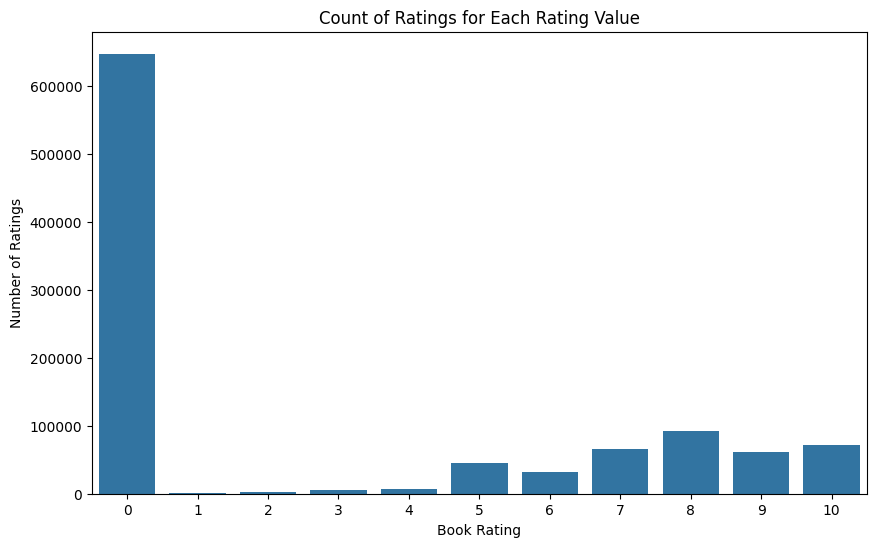

In [ ]:
# Book ratings and its count
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Book-Rating")
plt.title("Count of Ratings for Each Rating Value")
plt.xlabel("Book Rating")
plt.ylabel("Number of Ratings")
plt.show()


Text(0.5, 1.0, 'Top 10 author with number of books')

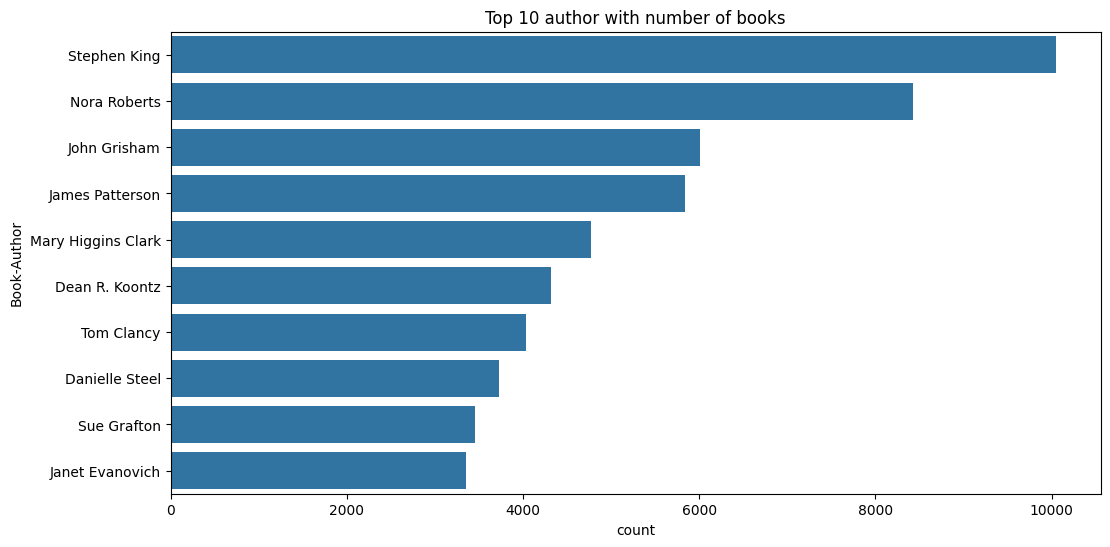

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author", data=data,order=data['Book-Author'].value_counts().index[0:10])
plt.title("Top 10 author with number of books")

Text(0.5, 1.0, 'Top 10 books Basis of count')

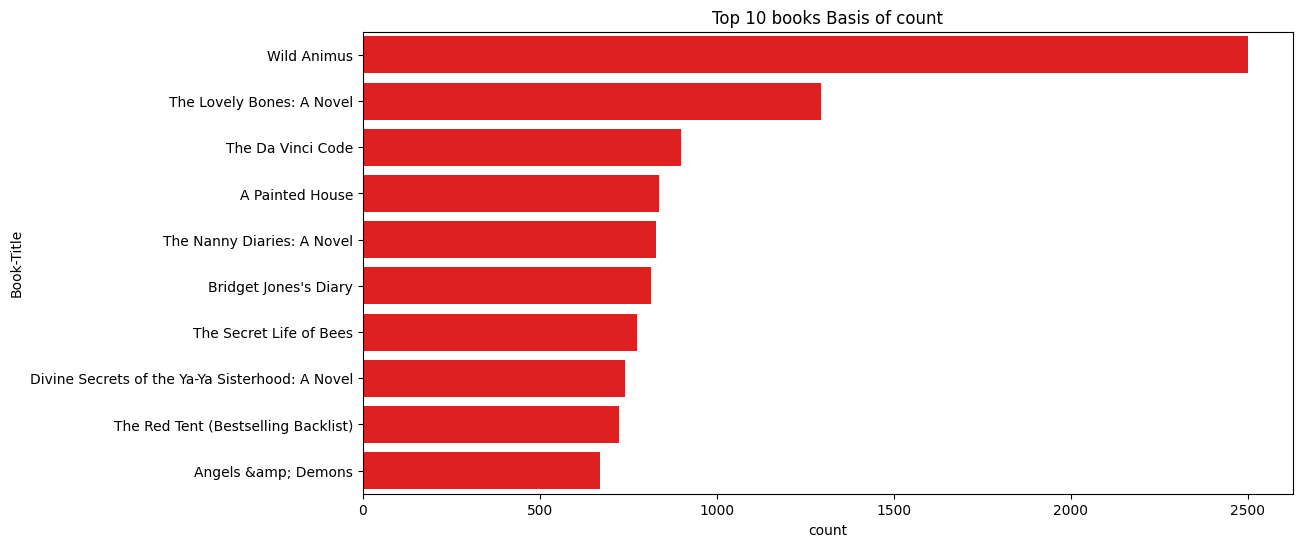

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Title", data=data,order=data['Book-Title'].value_counts().index[0:10],color="red")
plt.title("Top 10 books Basis of count")

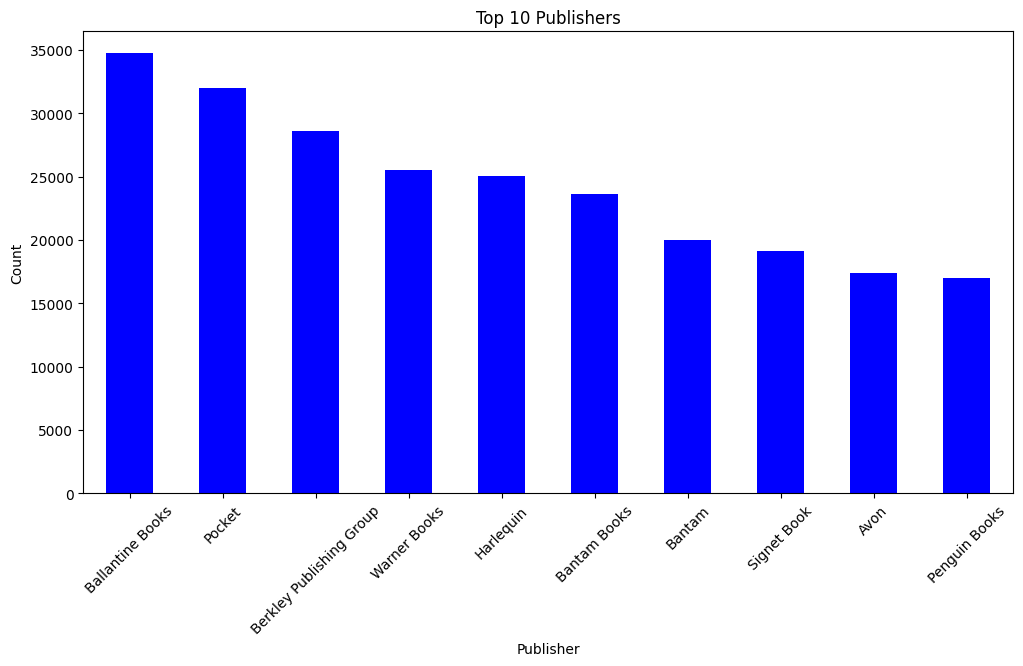

In [ ]:
top_publishers = data['Publisher'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='blue')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()

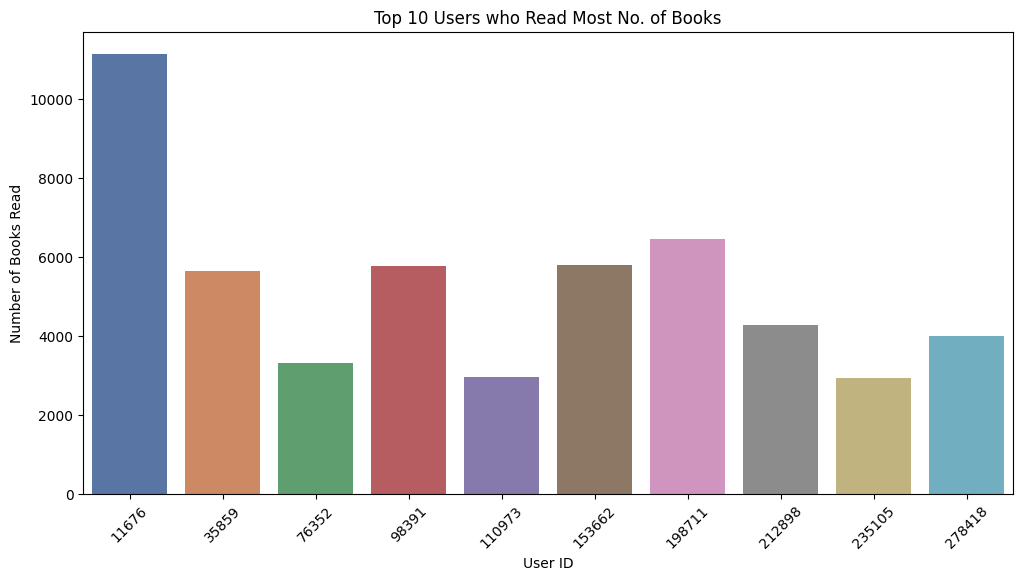

In [ ]:
# Top 10 users who read most number of books
top_users = data.groupby('User-ID')['Book-Title'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette='deep')
plt.xlabel('User ID')
plt.ylabel('Number of Books Read')
plt.title('Top 10 Users who Read Most No. of Books')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Age Distribution')

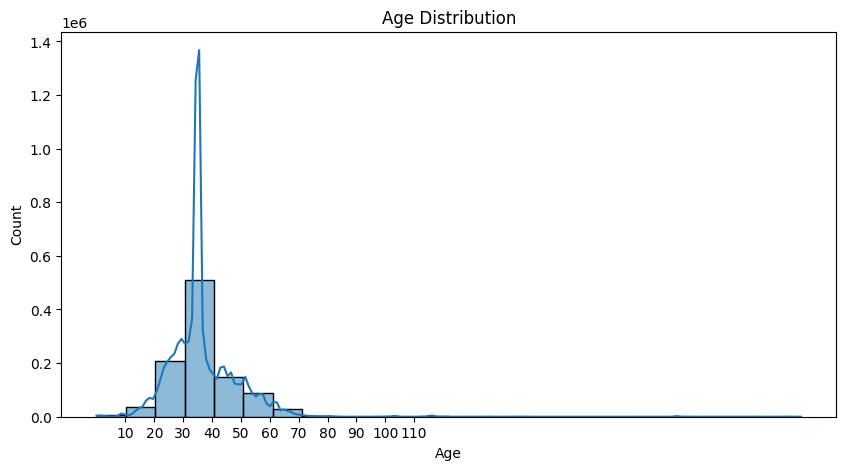

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=data, x='Age', binwidth=10, kde=True)
ax.set_xticks(np.arange(10, 120, 10))
ax.set_title('Age Distribution')

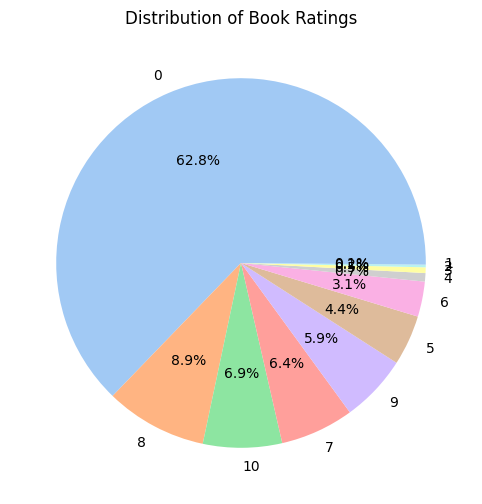

In [ ]:
# Pie chart of book ratings
plt.figure(figsize=(10,6))
labels = data['Book-Rating'].value_counts().index.to_list()
sizes = data['Book-Rating'].value_counts().to_list()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Book Ratings')
plt.show()

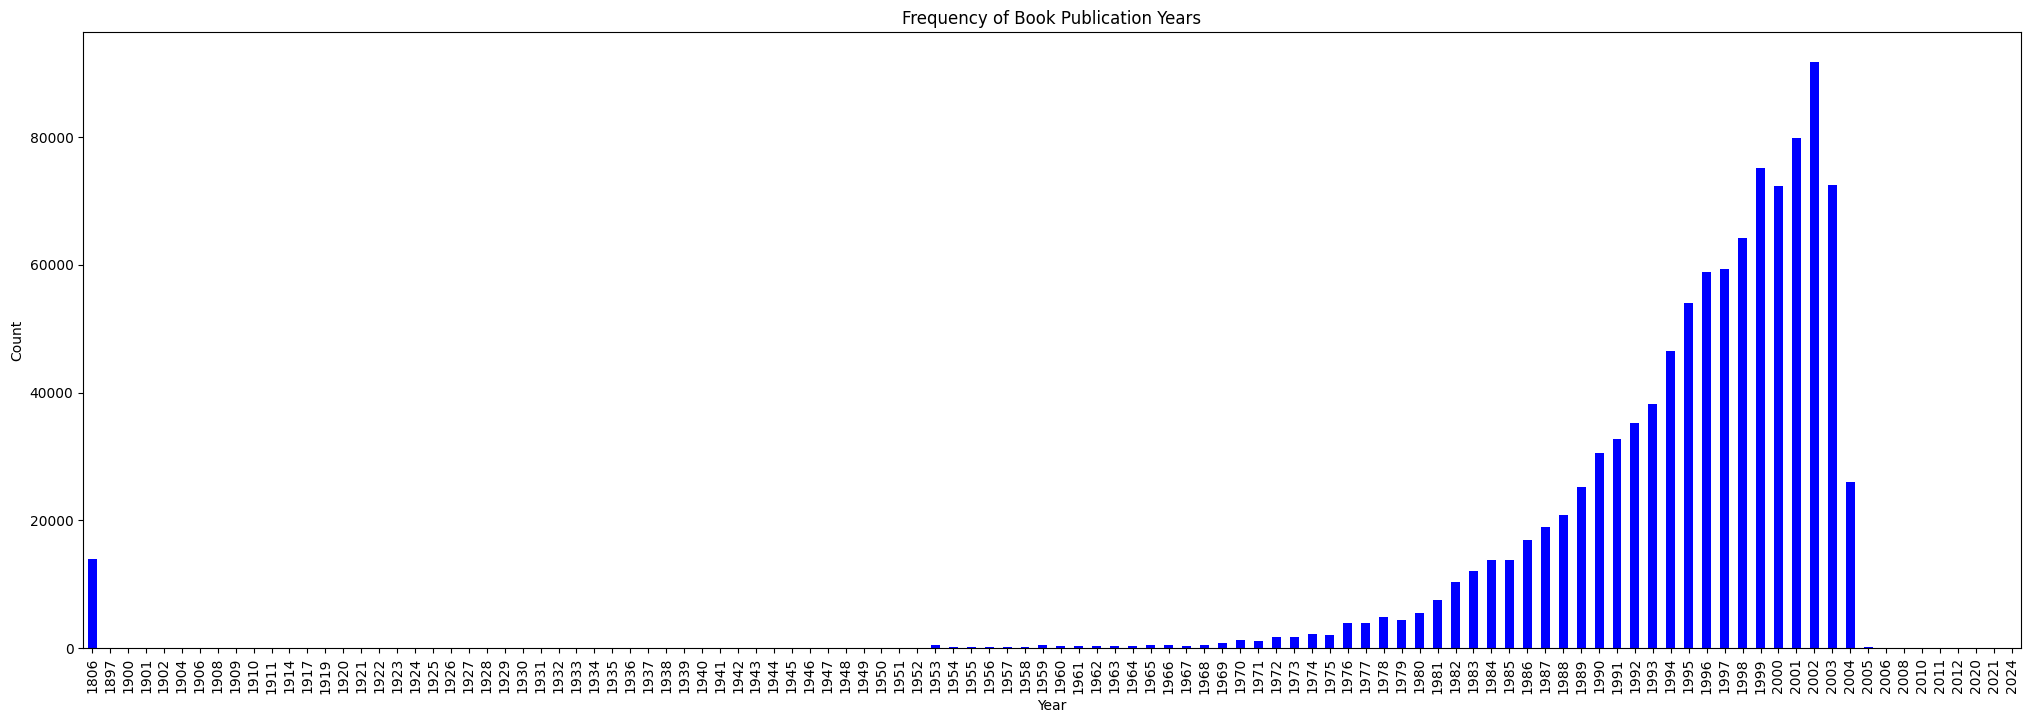

In [ ]:
plt.figure(figsize=(25, 8))
data['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Frequency of Book Publication Years')
plt.show()

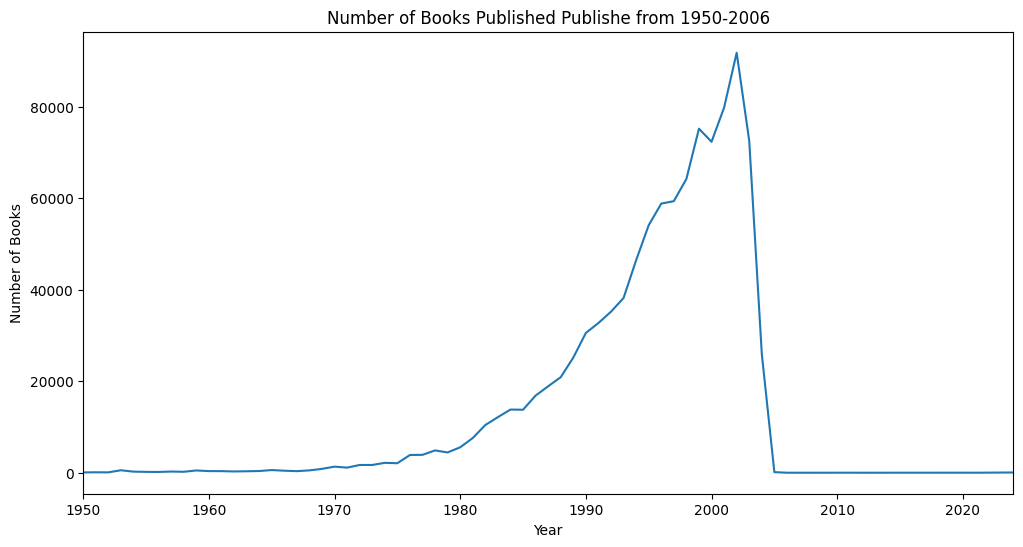

In [ ]:
#books published between 1950 and 2024
data_filtered = data[data["Year-Of-Publication"].between(1950, 2024)]
data_grouped = data_filtered.groupby("Year-Of-Publication").size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_grouped.index, y=data_grouped.values)
plt.xlim(1950, 2024)
plt.title("Number of Books Published Publishe from 1950-2006")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()


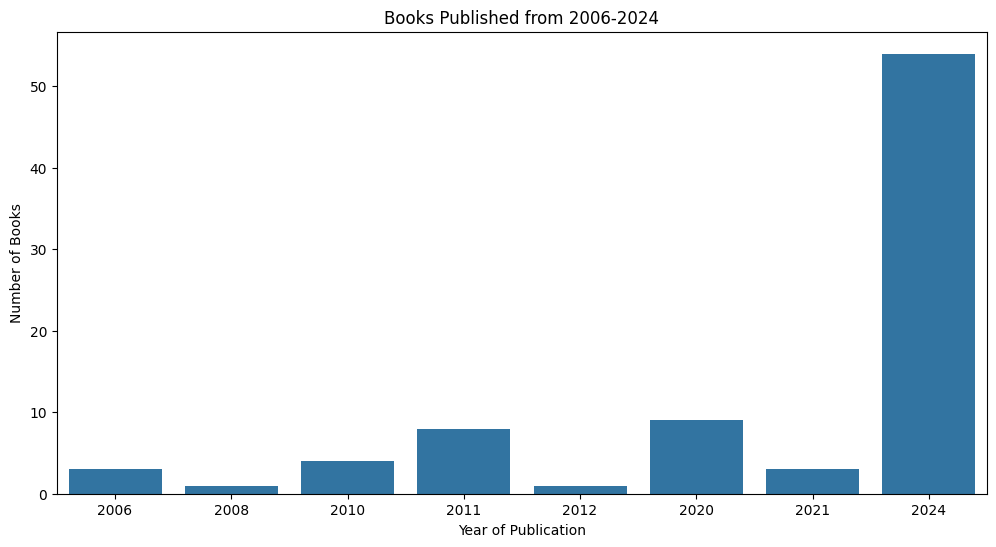

In [ ]:
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype(int)
plt.figure(figsize=(12, 6))
sns.countplot(x="Year-Of-Publication", data=data[data['Year-Of-Publication'].between(2006, 2024)])
plt.title("Books Published from 2006-2024")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.show()

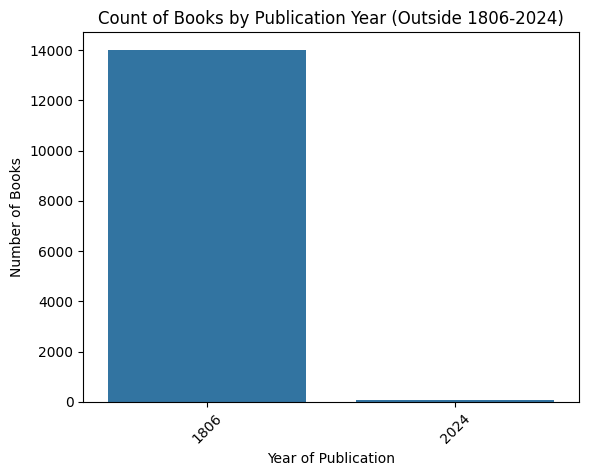

In [ ]:
#countplot of the "Year-Of-Publication" column
sns.countplot(x='Year-Of-Publication', data=data[(data['Year-Of-Publication'] <=1806) | (data["Year-Of-Publication"] >= 2024)])
plt.xticks(rotation=45)
plt.title("Count of Books by Publication Year (Outside 1806-2024)")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.show()

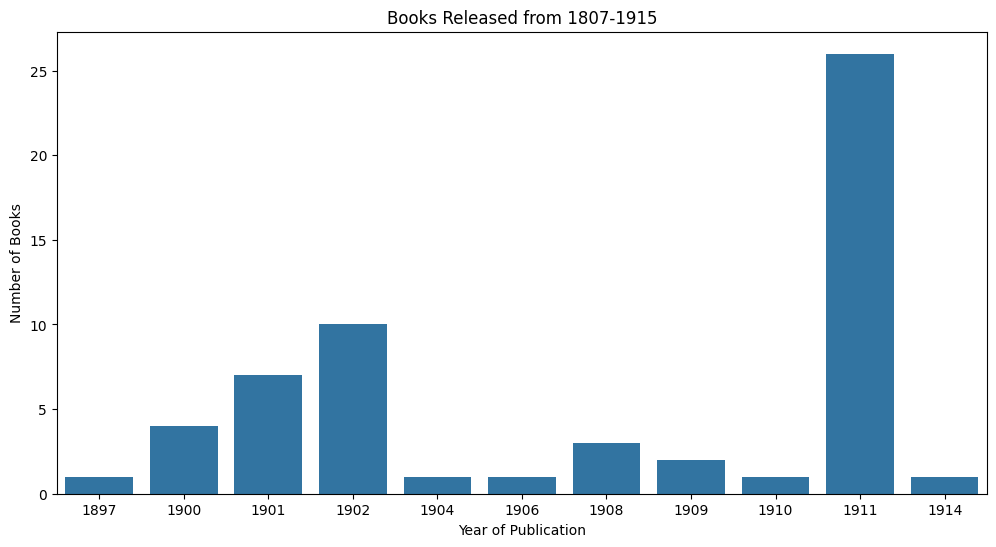

In [ ]:
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype(int)
plt.figure(figsize=(12, 6))
sns.countplot(x="Year-Of-Publication", data=data[data['Year-Of-Publication'].between(1807,1915)])
plt.title("Books Released from 1807-1915")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.show()

# Data Transformation

In [ ]:
data1=data.copy()

In [ ]:
# For a better recommendation, excluding data with 0 ratings
data1 = data1[data1['Book-Rating'] != 0]
data1

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
72,8,35,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner
80,8,35,0887841740,5,The Middle Stories,Sheila Heti,2004,House of Anansi Press
82,8,35,1552041778,5,Jane Doe,R. J. Kaiser,1999,Mira Books
91,8,35,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade
92,8,35,1575663937,6,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999,Kensington Publishing Corp.
...,...,...,...,...,...,...,...,...
353824,278854,35,0375703063,7,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997,Vintage Books
807412,278854,35,0553275739,6,In Her Day,Rita Mae Brown,1988,Bantam Books
177877,278854,35,0553579606,8,Ashes to Ashes,TAMI HOAG,2000,Bantam
342038,278854,35,0316184152,7,Final Harvest : Poems,Emily Dickinson,1964,Back Bay Books


In [ ]:
# books with count of ratings less than 10
data1[data1.groupby(['Book-Title'])['Book-Rating'].transform('count') < 10].groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)

Book-Title
Adventures of Sherlock Holmes        9
The Dangerous Husband : A Novel      9
The Snow Garden : A Novel            9
Hot Money                            9
Horsemasters Daughter                9
                                    ..
Jake Finds Out (Making Out, No 2)    1
Jake (The Cowboys)                   1
Jake &amp; Christy (Love Stories)    1
Jake                                 1
Ã?Â?thique en toc                    1
Name: Book-Rating, Length: 129854, dtype: int64

In [ ]:
# DROP THE BOOKS HAVING RATING COUNT LESS THAN 10
# Books with very few ratings (e.g., less than 10) might not have enough data to make reliable recommendations.
data1 = data1[data1.groupby('Book-Title')['Book-Rating'].transform('count') >= 10]
data1.shape

(159553, 8)

In [ ]:
#AVG RATING OF BOOKS
data1.groupby('Book-Title')['Book-Rating'].mean().head(15)

Book-Title
'Salem's Lot                            7.863636
10 Lb. Penalty                          7.421053
100 Selected Poems by E. E. Cummings    8.800000
101 Dalmatians                          8.916667
14,000 Things to Be Happy About         7.200000
16 Lighthouse Road                      7.294118
1984                                    8.784722
1st to Die: A Novel                     7.711864
2001: A Space Odyssey                   9.000000
2010: Odyssey Two                       7.500000
203 Ways to Drive a Man Wild in Bed     6.100000
204 Rosewood Lane                       8.066667
2061: Odyssey Three                     7.523810
24 Hours                                7.558824
253                                     7.500000
Name: Book-Rating, dtype: float64

#Model Building

####Collaborative filtering:
Used to predict the preferences or ratings of a user for a particular item based on the preferences or ratings of many users.

* User-Based Collaborative Filtering
:Recommends items to a user based on the preferences of similar users.

* Item-Based Collaborative Filtering
:Recommends items similar to those a user has liked in the past.

Matrix Factorization Techniques
: Decomposes the user-item interaction matrix into lower-dimensional matrices representing latent factors of users and items.

  Popular Techniques:
  * Singular Value Decomposition (SVD)
  * Alternating Least Squares (ALS)

In [ ]:
data1.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
520,9,35,0452264464,6,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
3271,16,35,0345402871,9,Airframe,Michael Crichton,1997,Ballantine Books
4074,17,35,0891075275,6,Piercing the Darkness,Frank E. Peretti,1989,Crossway Books
4122,17,35,0891076182,3,Prophet,Frank E. Peretti,1992,Crossway Books
4158,19,14,0375759778,7,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks


In [ ]:
data1.shape

(159553, 8)

In [ ]:
data2=data1.copy()
data2=data2.head(15000)

In [ ]:
data2.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
520,9,35,0452264464,6,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
3271,16,35,0345402871,9,Airframe,Michael Crichton,1997,Ballantine Books
4074,17,35,0891075275,6,Piercing the Darkness,Frank E. Peretti,1989,Crossway Books
4158,19,14,0375759778,7,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks
4219,26,35,0446310786,10,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company


In [ ]:
data1.drop_duplicates(subset='User-ID', inplace=True)
user_item_matrix = data1.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)

In [ ]:
user_item_matrix

Book-Title,'Salem's Lot,10 Lb. Penalty,100 Selected Poems by E. E. Cummings,101 Dalmatians,"14,000 Things to Be Happy About",16 Lighthouse Road,1984,1st to Die: A Novel,2001: A Space Odyssey,2010: Odyssey Two,...,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,ZwÃ?Â¶lf.,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,stardust
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
sparse_user_item_matrix = csr_matrix(user_item_matrix.values)

#SVD

In collaborative filtering, SVD is used to decompose the user-item interaction matrix (ratings matrix) into lower-dimensional matrices. This helps in capturing latent factors that influence user preferences and item characteristics.

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(sparse_user_item_matrix, k=50)
predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)

In [ ]:
U, sigma, Vt

(array([[-1.44939737e-35,  1.79423057e-19, -3.07274300e-21, ...,
          2.55266033e-20,  3.29992657e-19, -2.03278748e-19],
        [-2.73288601e-18,  6.62377936e-20,  1.38776297e-17, ...,
         -1.10544884e-18,  2.57295749e-19,  3.42434663e-18],
        [-3.42338224e-21, -2.90004391e-20,  1.38418817e-22, ...,
          7.74369566e-21, -5.34271352e-20,  4.01760244e-20],
        ...,
        [-5.83058018e-20, -8.01832703e-19, -9.36000071e-20, ...,
          1.21453381e-19, -9.81590142e-19,  3.38114277e-19],
        [ 4.50243060e-19, -1.80562575e-18,  6.73154066e-19, ...,
         -1.92434656e-21,  6.12040264e-19, -2.80096789e-19],
        [ 2.23638811e-19, -3.62152231e-19, -1.00633255e-21, ...,
          2.62252799e-20,  2.41549392e-19, -1.75061112e-19]]),
 array([ 60.58877784,  60.67948583,  60.67948583,  60.70420084,
         60.97540488,  61.53860577,  61.65225057,  62.45798588,
         62.90468981,  63.21392252,  63.37191807,  63.49803147,
         64.68384652,  64.86909896,  

In [ ]:
predicted_ratings

array([[ 8.99276279e-34, -1.38225215e-33,  1.67386226e-33, ...,
         2.63110103e-33, -2.00456399e-34,  1.32767908e-33],
       [-3.70091194e-32, -5.62045743e-32,  4.48410891e-32, ...,
         1.99451140e-31,  3.94139353e-33, -4.80022636e-32],
       [ 1.92317759e-34, -7.19028054e-34,  8.91532861e-34, ...,
         5.05080664e-33,  5.45640022e-35, -4.84526830e-34],
       ...,
       [-7.04091278e-33, -3.45940728e-34,  1.25076195e-33, ...,
        -6.52044725e-33,  7.94611823e-34, -1.64900417e-33],
       [ 5.52164045e-33,  1.08950052e-34,  6.38847420e-33, ...,
         2.33488798e-32, -8.55867761e-34,  2.34191806e-33],
       [-6.13464393e-34, -4.05930155e-34,  3.69362954e-35, ...,
         1.59467599e-33,  4.23037677e-34,  4.71605756e-34]])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(user_item_matrix.values, predicted_ratings)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.0993689503476189


In [ ]:
!pip install surprise

In [ ]:
from surprise import SVD
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1, 10))
data3 = Dataset.load_from_df(data2[['User-ID', 'Book-Title', 'Book-Rating']], reader)
trainset, testset = train_test_split(data3, test_size=0.1, random_state=42)
algo1 = SVD()
cross_validate(algo1, data3, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_factors': [50, 100, 200], 'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data3)
best_params = gs.best_params['rmse']
print("Best hyperparameters:", best_params)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7239  1.7600  1.7278  1.7518  1.7498  1.7426  0.0142  
MAE (testset)     1.3681  1.3861  1.3633  1.3904  1.3697  1.3755  0.0107  
Fit time          0.30    0.33    0.63    0.49    0.32    0.42    0.13    
Test time         0.01    0.01    0.01    0.02    0.01    0.01    0.00    
Best hyperparameters: {'n_factors': 100, 'lr_all': 0.005, 'reg_all': 0.02}


In [ ]:
best_algo = SVD(n_factors=best_params['n_factors'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
best_algo.fit(trainset)

In [ ]:
# Recommend items for a user
def recommend_books_svd(user_id, predicted_ratings, user_item_matrix, top_n=10):
    user_row_idx = user_item_matrix.index.get_loc(user_id)
    user_ratings = predicted_ratings[user_row_idx]
    book_indices = np.argsort(user_ratings)[::-1][:top_n]
    recommended_books = user_item_matrix.columns[book_indices]
    return recommended_books

In [ ]:
def get_recommendations(user_id):
    # Check if user ID exists in the user-item matrix
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found.")
    else:
        recommended_books_svd = recommend_books_svd(user_id, predicted_ratings, user_item_matrix)
        print(f"Books recommended for user {user_id}:")
        for book_title in recommended_books_svd:
            print(book_title)

In [ ]:
get_recommendations(9)

Books recommended for user 9:
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson
Suzanne's Diary for Nicholas
Seabiscuit: An American Legend
The Poisonwood Bible: A Novel
Snow Falling on Cedars
Timeline
The Joy Luck Club
The Da Vinci Code
A Prayer for Owen Meany
Bridget Jones's Diary


In [ ]:
get_recommendations(11)

User ID 11 not found.


In [ ]:
get_recommendations(278846)

Books recommended for user 278846:
Where the Heart Is (Oprah's Book Club (Paperback))
Summer Sisters
The Girls' Guide to Hunting and Fishing
The Summons
Seabiscuit: An American Legend
1st to Die: A Novel
Fahrenheit 451
The Secret Life of Bees
Bridget Jones's Diary
The Giver (21st Century Reference)
